In [1]:
# JesseRuiz_JosephBurton_nlp_project_Codeup_2019

In [158]:
from requests import get
import requests
from bs4 import BeautifulSoup
import os
import json
from pprint import pprint
import re
import time

import itertools as it
from typing import List, Dict
import pandas as pd

import numpy as np
import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Establish what computer programming languages are...

In [2]:
# Found on https://madnight.github.io/githut/#/pull_requests/2019/1
langs = ['JavaScript',
'Python',
'Java',
'Go',
'C++',
'Ruby',
'PHP',
'TypeScript',
'C#',
'C',
'Shell',
'Scala',
'Swift',
'Rust',
'Kotlin',
'Objective-C',
'Groovy',
'Elixir',
'Lua',
'DM',
'Perl',
'Dart',
'Clojure',
'PowerShell',
'CoffeeScript',
'Haskell',
'OCaml',
'R',
'Emacs Lisp',
'Vim script',
'Jsonnet',
'Erlang',
'Puppet',
'Julia',
'Smalltalk',
'MATLAB',
'WebAssembly',
'Fortran',
'F#',
'Visual Basic',
'Apex',
'ABAP',
'Vala',
'Nix',
'Crystal',
'Roff',
'Perl 6',
'FreeMarker',
'PureScript',
'Objective-C++',
'HTML',
'CSS',
'Vue']

In [3]:
langs = [element.lower() for element in langs]
langs

['javascript',
 'python',
 'java',
 'go',
 'c++',
 'ruby',
 'php',
 'typescript',
 'c#',
 'c',
 'shell',
 'scala',
 'swift',
 'rust',
 'kotlin',
 'objective-c',
 'groovy',
 'elixir',
 'lua',
 'dm',
 'perl',
 'dart',
 'clojure',
 'powershell',
 'coffeescript',
 'haskell',
 'ocaml',
 'r',
 'emacs lisp',
 'vim script',
 'jsonnet',
 'erlang',
 'puppet',
 'julia',
 'smalltalk',
 'matlab',
 'webassembly',
 'fortran',
 'f#',
 'visual basic',
 'apex',
 'abap',
 'vala',
 'nix',
 'crystal',
 'roff',
 'perl 6',
 'freemarker',
 'purescript',
 'objective-c++',
 'html',
 'css',
 'vue']

# Acquire

### General approach to choosing what type of data to scrape from Github: 
#### Use the url: https://github.com/search?o=desc&q=stars%3A%3E1&s=updated&type=Repositories
### This page shows the most recently updates repos on Github.

In [4]:
base_url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'

### Each page contains 10 repos... 

### How to find the URLS from many pages on this page: 
https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories

In [5]:
def get_url_list():
    '''Finds a long list of urls based on a max number of pages, which is hardcoded into the function.'''
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    max_page = 21
    for i in range(1,max_page):
        url = 'https://github.com/search?o=desc&p=' + str(i) + '&q=stars%3A%3E1&s=updated&type=Repositories/'
        print(f'traversing url: {url}')
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text)
        page = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
        for div in page:
            repos = []
            repos.append(re.findall(r'.*/.*',div.text)[0])
            urls.append(repos)
        time.sleep(5)
        print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
        
        
    return final_urls
            

In [18]:
get_url_list()

traversing url: https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories/
10
traversing url: https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=updated&type=Repositories/
20
traversing url: https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=updated&type=Repositories/
30
traversing url: https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=updated&type=Repositories/
40
traversing url: https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=updated&type=Repositories/
50
traversing url: https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=updated&type=Repositories/
70
traversing url: https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=updated&type=Repositories/
80

['https://github.com/ethereum/solidity-test-bytecode',
 'https://github.com/vauxoo-dev/openacademy-project',
 'https://github.com/nzbget/nzbget',
 'https://github.com/batfish/batfish',
 'https://github.com/brandtbucher/pycapi',
 'https://github.com/graphprotocol/graph-ts',
 'https://github.com/project-flogo/core',
 'https://github.com/rubensolv/MicroRTS',
 'https://github.com/PhoenicisOrg/phoenicis',
 'https://github.com/coreos/kube-prometheus',
 'https://github.com/project-flogo/core',
 'https://github.com/rubensolv/MicroRTS',
 'https://github.com/PhoenicisOrg/phoenicis',
 'https://github.com/coreos/kube-prometheus',
 'https://github.com/flant/logboek',
 'https://github.com/Lombiq/Pretty-Good-Bootstrap-Base-Theme',
 'https://github.com/operator-framework/operator-sdk',
 'https://github.com/plastiqueapp/plastique',
 'https://github.com/conda-forge/feedstocks',
 'https://github.com/keymanapp/keyboards',
 'https://github.com/operator-framework/operator-sdk',
 'https://github.com/plastiqu

## Function name: get_url_list() -> Prints a few statements and then returns a list of strings(urls).
### This is the desired list of urls because we can use this function to find more than 100 repositories. The number of pages to scrape is hard coded into the function.

## Function name: get_repo_all(urls) -> This takes a list of urls and then prints some statements and then returns a dataframe with info. on all urls.

In [7]:
def get_repo_all(urls):
    '''Takes a list of urls and returns a dataframe with the repo title, the repos programming language, the original text of the 
    README file and the number of stars that the repo has. If there were multiple languages, 
    we took the language that had the highest percentage.'''
    good_blobs = []
    read_me_list = []
    language_top = []
    stars = []
    for url in urls:
        response = requests.get(url)        
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-5')
        
        if read_me != None:
            if soup.find('span', class_='lang') != None:
                language_rm = soup.find('span', class_='lang').text
                language_top.append(language_rm)
            else: 
                language_top.append('None')
                
            if soup.find('a', class_='social-count js-social-count') != None:
                stars.append((re.findall(r'(\d+)', soup.find('a', class_='social-count js-social-count').attrs['aria-label']))[0])
            else:
                stars.append('None')
            read_me_list.append(read_me.text)
            good_blobs.append(url.split('/', 3)[-1])       
            
            print('Total number of repos scraped...', len(good_blobs))
    df = pd.DataFrame(list(zip(good_blobs,language_top, read_me_list, stars)))
    df.columns = ['title', 'language', 'original', 'stars']
    return df

In [11]:
df = get_repo_all(get_url_list())

traversing url: https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories/
10
traversing url: https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=updated&type=Repositories/
20
traversing url: https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=updated&type=Repositories/
30
traversing url: https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=updated&type=Repositories/
40
traversing url: https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=updated&type=Repositories/
50
traversing url: https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=updated&type=Repositories/
70
traversing url: https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=updated&type=Repositories/
80
traversing url: https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=updated&type=Repositories/
80
traversing url: https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=updated&type=Repositories/
80

### Save the dataframe to a CSV file so we can work with it offline (without querying GitHub).

In [12]:
df.to_csv('github_data.csv')

In [13]:
df.head()

,title,language,original,stars
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2


# Load Data into the Notebook for Preparation, Exploration and Modeling...

### This notebook saves a large dataset with all the repos. Because this is so big, we saved it to a csv. 

## Read in CSV.

# First run of modeling, we acquired about 150 repos to do modeling. -> github_data.csv

# Second run through, we acquired about 522 repos. -> github_large_data.csv

# We will use the second csv file to do work.

In [183]:
from env import path

### Leaving the work for the first modeling phase below...

In [184]:
file = 'github_large_data.csv'

In [185]:
df = pd.read_csv(path+file, header='infer')

In [186]:
df

,title,language,original,stars
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70


In [187]:
df.shape

(522, 4)

# Prepare

In [188]:
def original_word_count():
    '''This function adds a new column to the dataframe which counts the number of words in the README file'''
    df[['original_cnt']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.original_cnt[art_num] = len(df['original'][art_num].split())
    df['original_cnt']=df['original_cnt'].astype(int)
    return df

In [189]:
original_word_count()
df.head()

,title,language,original,stars,original_cnt
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615


In [190]:
def basic_clean():
    '''This function adds a new column to the dataframe which takes the original README file text and does some cleaning.
    It lower cases, normalizes, encodes and decodes with ascii and utf-8 decoding, then removes special character. 
    Returns the clean text in the new column, article'''
    df[['article']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        original = df.article[art_num]
        article = re.sub(r'\s', ' ', original).lower()
        normalized = unicodedata.normalize('NFKD', article)
        just_ascii = normalized.encode('ascii', 'ignore')
        article = just_ascii.decode('utf-8')
        without_special_chars = re.sub(r'[^\w\s]', ' ', article)
        word_list = without_special_chars.split()
        article_final = ' '.join(word_list)
        df.article[art_num] = article_final
    return df

In [191]:
basic_clean()

,title,language,original,stars,original_cnt,article
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...


In [192]:
def article_word_count():
    '''This function adds a new column to the dataframe and does a word count of the article column.'''
    df[['article_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.article_cnt[art_num] = len(df['article'][art_num].split())
    df['article_cnt']=df['article_cnt'].astype(int)
    return df

In [193]:
article_word_count()

,title,language,original,stars,original_cnt,article,article_cnt
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409


In [194]:
def article_percent():
    '''This function calculates what percentage of the original text was kept after the basic clean function.'''
    df[['article_per_kept']] = df[['article_cnt']]
    df[['article_per_kept']] = df.article_cnt / df.original_cnt
    df['article_per_kept']=df['article_per_kept'].astype(float)
    return df

In [195]:
article_percent()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413


In [196]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693


In [197]:
def lemmatize():
    '''This function adds a new column to the data frame and lemmatizes the article column text.'''
    df[['lemmatized']] = df[['article']]
    art_nums = list(range(df.article.count()))
    wnl = nltk.stem.WordNetLemmatizer()
    for art_num in art_nums:
        lemm_article = df.lemmatized[art_num]
        lemmas = [wnl.lemmatize(word) for word in lemm_article.split()]
        article_lemmatized = ' '.join(lemmas)
        df.lemmatized[art_num] = article_lemmatized
    return df

In [198]:
lemmatize()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714,site configuration theme build contributing pe...
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714,geotiff the key folder where the asciidoc spec...
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413,justwatchapi justwatch com python 3 api instal...


In [199]:
def lemm_word_count():
    '''This function adds a new column to the dataframe and does a word count of the lemmatize column.'''
    df[['lemm_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.lemm_cnt[art_num] = len(df['lemmatized'][art_num].split())
        
    df.lemm_cnt = df.lemm_cnt.astype(int)
    return df

In [200]:
lemm_word_count()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...,482
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...,293
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714,site configuration theme build contributing pe...,11
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714,geotiff the key folder where the asciidoc spec...,45
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413,justwatchapi justwatch com python 3 api instal...,409


### Examine how the lemmatize function worked... It looks like it didn't do TOO much work.

In [201]:
df['article'].iloc[0]

'netbsd netbsd is a free fast secure and highly portable unix like open source operating system it is available for a wide range of platforms from large scale servers and powerful desktop systems to handheld and embedded devices building you can cross build netbsd from most unix like operating systems to build for amd64 x86_64 in the src directory build sh u u j4 m amd64 o obj release additional build information available in the building file binaries daily builds releases testing on a running netbsd system cd usr tests atf run atf report troubleshooting send bugs and patches via web form subscribe to the mailing lists the netbsd users list is a good choice for many problems watch current users if you follow the bleeding edge of netbsd current join the community irc channel netbsd freenode latest sources to fetch the main cvs repository cvs d anoncvs anoncvs netbsd org cvsroot checkout p src to work in the git mirror which is updated every few hours from cvs git clone https github com

In [202]:
df['lemmatized'].iloc[0]

'netbsd netbsd is a free fast secure and highly portable unix like open source operating system it is available for a wide range of platform from large scale server and powerful desktop system to handheld and embedded device building you can cross build netbsd from most unix like operating system to build for amd64 x86_64 in the src directory build sh u u j4 m amd64 o obj release additional build information available in the building file binary daily build release testing on a running netbsd system cd usr test atf run atf report troubleshooting send bug and patch via web form subscribe to the mailing list the netbsd user list is a good choice for many problem watch current user if you follow the bleeding edge of netbsd current join the community irc channel netbsd freenode latest source to fetch the main cv repository cv d anoncvs anoncvs netbsd org cvsroot checkout p src to work in the git mirror which is updated every few hour from cv git clone http github com netbsd src git additio

In [203]:
df.dtypes

title                object
language             object
original             object
stars                 int64
original_cnt          int64
article              object
article_cnt           int64
article_per_kept    float64
lemmatized           object
lemm_cnt              int64
dtype: object

In [204]:
df.language.value_counts()

JavaScript             63
Python                 63
None                   49
Java                   43
C++                    39
C#                     32
HTML                   32
C                      24
Shell                  17
TypeScript             16
Go                     16
PHP                    15
CSS                    14
Rust                   10
Vue                     7
Ruby                    7
Scala                   6
Jupyter Notebook        6
R                       6
Lua                     5
Swift                   4
Dart                    4
Emacs Lisp              4
Haskell                 3
PowerShell              3
XSLT                    3
Perl                    3
Elixir                  2
Kotlin                  2
Assembly                2
Groovy                  2
Clojure                 2
Nix                     2
Processing              2
Makefile                1
Pascal                  1
Dockerfile              1
Verilog                 1
PLpgSQL     

## The number of words stays the same for each file after lemmatization. Some of the words have changed, CSS is now just CS.

In [205]:
df[df.article_cnt != df.lemm_cnt]

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt


### Make sure the language column is lower cased

In [206]:
df['language'] = df['language'].str.lower()

In [207]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188
1,morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124
2,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1
3,AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568
4,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797


In [208]:
df.dtypes

title                object
language             object
original             object
stars                 int64
original_cnt          int64
article              object
article_cnt           int64
article_per_kept    float64
lemmatized           object
lemm_cnt              int64
dtype: object

## Let's remove stopwords and create two more columns, one for the count of words after stopwords removed and another than shows the percentage of words still left.

In [209]:
### FOR SOME REASON THIS FUNCTION IS NOT WORKING WITH THE NEW DATA SO RESORT TO A SIMPLER FUNCTION... SEE NEXT CELL.
# def remove_stopwords(extra_words=None, exclude_words=None):
#     '''This function removes stopwords from the dataframe and returns the dataframe with 4 new columns.
#     The new columns are clean, word_cnt_after_stop, per_stopwords_kept, per_overall_kept.'''
#     wnl = nltk.stem.WordNetLemmatizer()
#     stopwords = nltk.corpus.stopwords.words('english')
#     if extra_words != None:
#         stopwords = stopwords + extra_words
#     if exclude_words != None:
#         stopwords = [word for word in stopwords if word not in exclude_words]
#     #make a new column by copying a column...
#     df[['clean']] = df[['article']]
#     df[['word_cnt_after_stop']] = df[['article']]
#     art_nums = list(range(df.article.count()))
#     for art_num in art_nums:
#         words = df.clean[art_num].split()
#         without_stopwords = [word for word in words if word not in stopwords]
#         df.word_cnt_after_stop[art_num] = len(without_stopwords)
#         without_stopwords_join = ' '.join(without_stopwords)
#         df.clean[art_num] = without_stopwords_join
#     #make a new column by copying a column...
#     df[['per_stopwords_kept']] = df[['title']]
#     df[['per_overall_kept']] = df[['title']]
#     for art_num in art_nums:
#         df.per_stopwords_kept[art_num] = df.word_cnt_after_stop[art_num] / df.lemm_cnt[art_num]
#         df.per_overall_kept = df.word_cnt_after_stop[art_num] / df.original_cnt[art_num]
#     df[['per_stopwords_kept']] = df[['per_overall_kept']].astype(float)
#     df[['word_cnt_after_stop']] = df[['word_cnt_after_stop']].astype(int)
#     df[['per_overall_kept']] = df[['per_overall_kept']].astype(float)
#     return df

In [210]:
def remove_stopwords(string, string_or_list='string', extra_words=None, exclude_words=None):
    """Removes the stopwords from the text then returns it. Able to add or remove stopwords."""
    stopword_list = stopwords.words('english') #+ LANGUAGES
    if extra_words != None:
        for word in extra_words:
            stopword_list.append(word)
    if exclude_words != None:
        for word in exclude_words:
            stopword_list.remove(word)
    filtered_words = [word for word in string.split() if word not in stopword_list]
    filtered_string = ' '.join(filtered_words)
    if string_or_list == 'string':
        return filtered_string
    if string_or_list == 'list':
        return filtered_words

In [211]:
df['clean'] = df.article.apply(remove_stopwords)

In [212]:
# df = df.drop(columns=['word_cnt_after_stop'])

In [213]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...
1,morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...
2,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo
3,AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright c 2017 regents univers...
4,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...


In [ ]:
df['word_cnt_after_stop'] = df.clean.str.split().str.len()


In [177]:
df['per_stopwords_kept'] = df[['title']]
df['per_overall_kept'] = df[['title']]

In [180]:
df.head(10)

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52
3,andrewrothstein/ansible-vagrant,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37
4,voken100g/AutoSSR,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615
5,tolo7010/hak.lnk,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48
6,firstcontributions/first-contributions,none,\n\n\n\nFirst Contributions\nIt's hard. It's a...,6630,676,first contributions it s hard it s always hard...,668,0.988166,first contribution it s hard it s always hard ...,668,first contributions hard always hard first tim...,362
7,tolo7010/hak.lnk,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48
8,MarkMoHR/Awesome-Image-Colorization,none,Awesome-Image-Colorization\nA collection of De...,11,562,awesome image colorization a collection of dee...,616,1.096085,awesome image colorization a collection of dee...,616,awesome image colorization collection deep lea...,562
9,jdlingyu/ad-wars,none,大圣净化 使用帮助\n应用下载地址(捐赠版本需激活码)\n\nhttps://fir.im/...,24,29,https fir im adwars viewid xposed telegram 404...,11,0.379310,http fir im adwars viewid xposed telegram 404 ...,11,https fir im adwars viewid xposed telegram 404...,11


In [164]:
# whoops... try that again. drop these columns
# df = df.drop(columns=['clean', 'word_cnt_after_stop', 'per_stopwords_kept', 'per_overall_kept'])

In [165]:
df.describe()

,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,1068.671512,697.697674,742.267442,1.069464,742.267442
std,5813.088506,1740.065413,1805.081219,0.221865,1805.081219
min,2.000000,12.000000,8.000000,0.177778,8.000000
25%,3.000000,103.000000,111.500000,1.013369,111.500000
50%,11.000000,268.000000,294.500000,1.060021,294.500000
75%,81.750000,575.250000,620.250000,1.112937,620.250000
max,67185.000000,16193.000000,17248.000000,3.725732,17248.000000


### Exploring the santitation process on our data.

In [133]:
df[df.per_stopwords_kept < .6]

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept


In [134]:
df[df.original_cnt < 11]

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
2,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo,1,0.680952,0.680952
19,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo,1,0.680952,0.680952
28,fate0/proxylist,html,"proxylist\n\nproxylist, generate by fate0/getp...",444,10,proxylist proxylist generate by fate0 getproxy...,11,1.100000,proxylist proxylist generate by fate0 getproxy...,11,proxylist proxylist generate fate0 getproxy pr...,9,0.680952,0.680952
32,silvernoo/ac-rss,python,AC-RSS\n订阅以下地址\nhttps://raw.githubusercontent....,17,8,ac rss https raw githubusercontent com silvern...,68,8.500000,ac r http raw githubusercontent com silvernoo ...,68,ac rss https raw githubusercontent com silvern...,68,0.680952,0.680952
33,CreatCodeBuild/brutal-algorithm-class,javascript,brutal-algorithm-class\n我所教的课《最强算法班》代码笔记\n,6,2,brutal algorithm class,3,1.500000,brutal algorithm class,3,brutal algorithm class,3,0.680952,0.680952
38,joimxjtuse/FuncTest,java,工作和学习中遇到的一些问题及其整理\n算法\nleet-code\n面试题\n设计模式\n经...,2,8,leet code,2,0.250000,leet code,2,leet code,2,0.680952,0.680952
48,xndcn/smzdm.com,none,smzdm.com\n,10,1,smzdm com,2,2.000000,smzdm com,2,smzdm com,2,0.680952,0.680952
52,PCGen/pcgen,java,How to compile PCGen?\nCheck out our WIKI: htt...,247,9,how to compile pcgen check out our wiki http w...,13,1.444444,how to compile pcgen check out our wiki http w...,13,compile pcgen check wiki http wiki pcgen org b...,9,0.680952,0.680952
54,yin1999/code_sharing,c++,此代码库用于保存我做题或通过其它途径接触到或者解决问题产生代码。\n,2,1,,0,0.000000,,0,,0,0.680952,0.680952
59,luyikk/NetX,c#,NetX\n谭释了RPC和ACTOR的完美结合\n,2,2,netx rpcactor,2,1.000000,netx rpcactor,2,netx rpcactor,2,0.680952,0.680952


### Drop repos that have a low wordcount in the Readme file

In [135]:
df = df[df.original_cnt > 10]

In [136]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.680952,0.680952
1,morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...,89,0.680952,0.680952
3,AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...,344,0.680952,0.680952
4,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.680952,0.680952
5,JingningShi/MtreeRing,r,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...,482,mtreering authors jingning shi wei xiang licen...,335,0.680952,0.680952


### Now we further filter the dataset so that we only analyze the programming languages that appear most often.

In [138]:
pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>15])

,language
python,59
javascript,59
none,36
c++,34
java,33
c#,27
html,24
c,24
go,16
shell,16


In [142]:
top_langs = pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>15])
top_langs.reset_index(inplace=True)
top_langs.columns = ['language', 'count']
top_langs

,language,count
0,python,59
1,javascript,59
2,none,36
3,c++,34
4,java,33
5,c#,27
6,html,24
7,c,24
8,go,16
9,shell,16


## Whereas in the first modeling phase, we focused on the languages that occured more than 5 times, since we have more data, we can focus on the languages that occur more than 15 times in the dataset. 

## This gives us 11 programming languages.

In [143]:
top_langs_list = list(top_langs.language)
top_langs_list

['python',
 'javascript',
 'none',
 'c++',
 'java',
 'c#',
 'html',
 'c',
 'go',
 'shell',
 'typescript']

## Still preparing the dataframe for analysis...

In [144]:
df = pd.merge(df, top_langs, on='language', how='inner')
df

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,count
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.680952,0.680952,36
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.680952,0.680952,36
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.680952,0.680952,36
3,andrewrothstein/ansible-vagrant,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,0.680952,0.680952,36
4,voken100g/AutoSSR,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.680952,0.680952,36
5,tolo7010/hak.lnk,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48,0.680952,0.680952,36
6,firstcontributions/first-contributions,none,\n\n\n\nFirst Contributions\nIt's hard. It's a...,6630,676,first contributions it s hard it s always hard...,668,0.988166,first contribution it s hard it s always hard ...,668,first contributions hard always hard first tim...,358,0.680952,0.680952,36
7,tolo7010/hak.lnk,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48,0.680952,0.680952,36
8,MarkMoHR/Awesome-Image-Colorization,none,Awesome-Image-Colorization\nA collection of De...,11,562,awesome image colorization a collection of dee...,616,1.096085,awesome image colorization a collection of dee...,616,awesome image colorization collection deep lea...,562,0.680952,0.680952,36
9,jdlingyu/ad-wars,none,大圣净化 使用帮助\n应用下载地址(捐赠版本需激活码)\n\nhttps://fir.im/...,24,29,https fir im adwars viewid xposed telegram 404...,11,0.379310,http fir im adwars viewid xposed telegram 404 ...,11,https fir im adwars viewid xposed telegram 404...,11,0.680952,0.680952,36


In [145]:
df.drop(columns='count', inplace=True)
df.head(3)

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.680952,0.680952
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.680952,0.680952
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.680952,0.680952


## Visualize

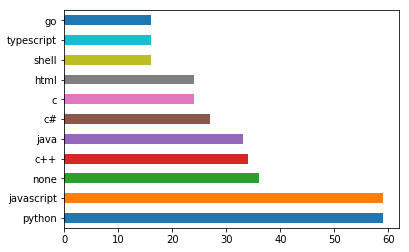

In [149]:
df.language.value_counts().plot.barh()


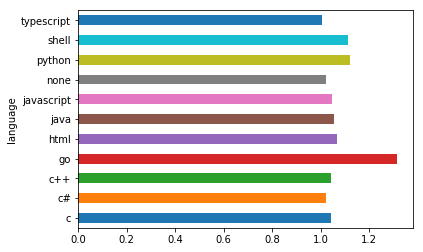

In [150]:
df.groupby('language')['article_per_kept'].mean().plot.barh()


# Exploration

In [151]:
def df_info():
    cols = ['stars',
 'original_cnt',
 'article_cnt',
 'article_per_kept',
 'lemm_cnt',
 'word_cnt_after_stop',
 'per_stopwords_kept',
 'per_overall_kept']
    
    for col in cols:
        print(str(col) + ':')
        print(pd.DataFrame(df.groupby('language')[col].describe().T))

In [152]:
df_info()


stars:
language            c           c#           c++           go        html  \
count        24.00000    27.000000     34.000000    16.000000   24.000000   
mean       2642.75000   109.925926   1517.117647   446.250000   40.291667   
std        6452.42444   280.916895   4844.453935   754.622952   81.914844   
min           2.00000     2.000000      2.000000     2.000000    2.000000   
25%           5.00000     4.000000      5.000000    11.750000    2.000000   
50%          49.00000     7.000000     81.000000    32.500000    6.000000   
75%        1960.50000    47.000000    716.250000   539.250000   21.250000   
max       23158.00000  1313.000000  27940.000000  2753.000000  285.000000   

language          java   javascript         none        python        shell  \
count        33.000000    59.000000    36.000000     59.000000    16.000000   
mean        776.878788   207.152542   405.694444   3125.627119   152.187500   
std        2557.694711   912.974370  1304.855806  12500.545933

In [155]:
import matplotlib as plt

In [156]:
def groupby_language_mean_plots():
    cols = ['stars',
 'original_cnt',
 'article_cnt',
 'article_per_kept',
 'lemm_cnt',
 'word_cnt_after_stop',
 'per_stopwords_kept',
 'per_overall_kept']
    
    for col in cols:
        print(str(col) + ':')
        plot = df.groupby('language')[col].mean().plot.barh()
        print(plt.show())

stars:


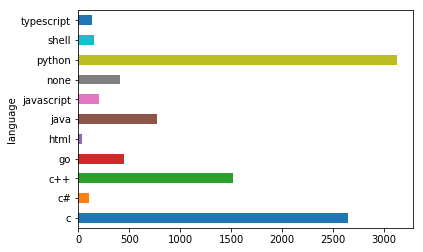

None
original_cnt:


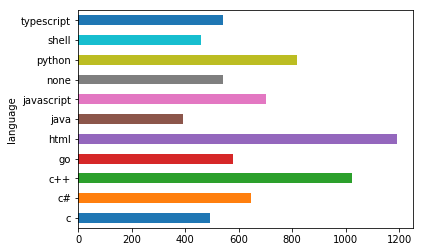

None
article_cnt:


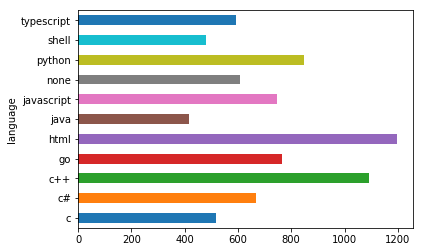

None
article_per_kept:


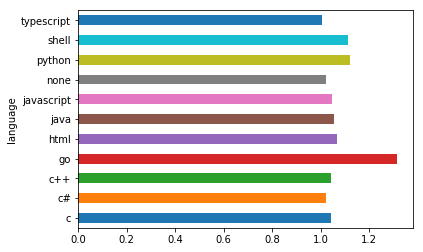

None
lemm_cnt:


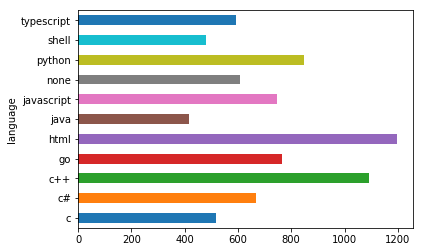

None
word_cnt_after_stop:


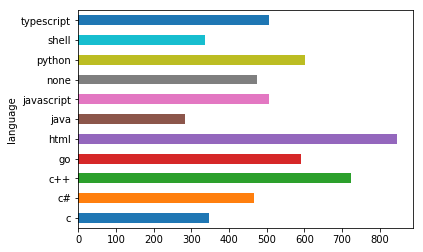

None
per_stopwords_kept:


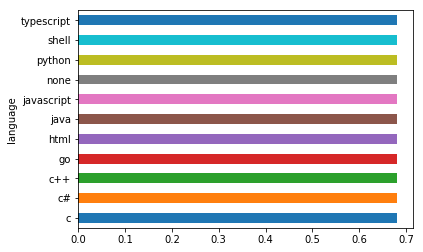

None
per_overall_kept:


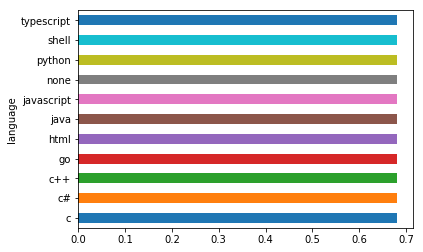

None


In [159]:
groupby_language_mean_plots()


### Explore the repos readme's that are PYTHON language...

In [160]:
py = df[df.language == 'python']
py.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
70,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.680952,0.680952
71,yongzhuo/nlp_xiaojiang,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,275,0.680952,0.680952
72,dawoudt/JustWatchAPI,python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413,justwatchapi justwatch com python 3 api instal...,409,justwatchapi justwatch com 3 api install pytho...,292,0.680952,0.680952
73,apple/swift-source-compat-suite,python,Swift Source Compatibility Suite\nSource compa...,197,1130,swift source compatibility suite source compat...,1218,1.077876,swift source compatibility suite source compat...,1218,source compatibility suite source compatibilit...,853,0.680952,0.680952
74,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.680952,0.680952


In [161]:
py_words = ' '.join(py.article)


(-0.5, 399.5, 199.5, -0.5)

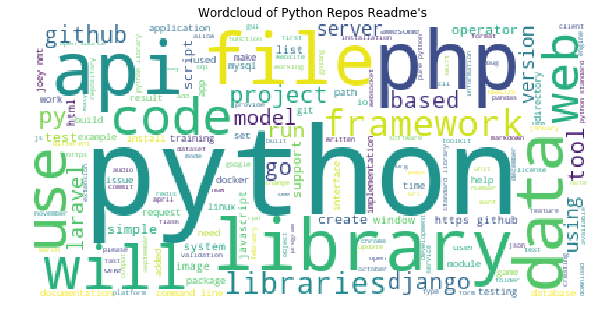

In [162]:
from wordcloud import WordCloud
img = WordCloud(background_color='white').generate(py_words)

plt.figure(figsize=(10,10))
plt.imshow(img)

plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')